# COMPONENT ONE

### 1.LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

---

### 2.IMPORTING DATASET 

In [3]:
df=pd.read_excel('sales.xlsx')

---

### 3.DATA-DESCRIPTION 

1. *INFORMATION ABOUT EACH COLUMN:*

1. **Order ID**      : Id no.of each order.
2. **Order Date**    : It represents On what date the order placed.
3. **Customer Name** : Name of the customer who placed the order.
4. **City**          : The name of the city  that customer belongs to.
5. **State**         : Name of the state that above city belongs in .
6. **Country**       : The name of the Country that above state is located in.
7. **Region**        : Which part of the region that country belongs to
8. **Segment**       : What type of customer(Home office,consumer,corporate etc..)
9. **Ship Mode**     : Which type of ship mode that ordr was placed in.
10. **Categorie**    : The order item belongs to which type of categorie(office supplies,Furniture etc..)
11. **Sub-Category** : Furthur items categories dividedinto sub-categories.
12. **Product-Name** : The name of the product.
13. **Cost**         : The cost of the ordered item.
14. **Sales**        : The no.of sales of the item.
15. **Profit**       : Profit amount that was gained by the company.
16. **Quantity**     : The no.of items.

2. *No.of rows and columns in the dataset:*

In [4]:
print("No.of rows : ",df.shape[0],", No.of columns : ",df.shape[1])

No.of rows :  4117 , No.of columns :  17


3. *Data Types of each column in datatset :*

In [5]:
data_types=df.dtypes
col_type_details= pd.DataFrame(data_types,columns=['data_type'])

In [6]:
col_type_details

,data_type
Order ID,float64
Order Date,datetime64[ns]
Customer Name,object
City,object
Country,object
State,object
Region,object
Region.1,object
Segment,object
Ship Mode,object


4.  *Top five entries in the dataset:*

In [7]:
df.head()

,Order ID,Order Date,Customer Name,City,Country,State,Region,Region.1,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity
0,1.0,2017-01-01,Ruby Patel,Stockholm,Sweden,Stockholm,North,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",9.0,45.0,36.0,3
1,2.0,2017-01-03,Summer Hayward,Southport,United Kingdom,England,North,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",255.0,854.0,599.0,7
2,3.0,2017-01-04,Devin Huddleston,Valence,France,Auvergne-Rhône-Alpes,Central,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",48.0,140.0,92.0,3
3,4.0,2017-01-04,Mary Parker,Birmingham,United Kingdom,England,North,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",9.0,27.0,18.0,2
4,5.0,2017-01-05,Daniel Burke,Echirolles,France,Auvergne-Rhône-Alpes,Central,Central,Home Office,Priority,Office Supplies,Art,"Binney & Smith Pencil Sharpener, Water Color",40.0,90.0,50.0,3


---

### 4.DATA CLEANING

1. *Replace object type "Nan" to actual "numpy-nan":*

In [8]:
df.replace(["Nan","NaT",'nan','NaN'], np.nan, inplace=True)

2. *Check the percentage and count of the null values in each column:*

In [9]:
# Percentage of null values

df.isnull().mean()*100

Order ID         0.024290
Order Date       0.024290
Customer Name    0.024290
City             0.024290
Country          0.024290
State            0.024290
Region           0.267185
Region.1         0.267185
Segment          0.267185
Ship Mode        0.218606
Category         0.024290
Sub-Category     0.024290
Product Name     0.024290
Cost             0.024290
Sales            0.024290
Profit           0.024290
Quantity         0.145737
dtype: float64

In [10]:
# Count of Null values in each column

df.isnull().sum()

Order ID          1
Order Date        1
Customer Name     1
City              1
Country           1
State             1
Region           11
Region.1         11
Segment          11
Ship Mode         9
Category          1
Sub-Category      1
Product Name      1
Cost              1
Sales             1
Profit            1
Quantity          6
dtype: int64

3. *Find and remove or Fill the null values and also duplicate rows and columns:*

In [11]:
# First : check for the row with whole null values

df[df.isnull().all(axis=1)]

,Order ID,Order Date,Customer Name,City,Country,State,Region,Region.1,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity
1732,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Found the row(entry) with null values so drop the row based on index

df.drop(df[df.isnull().all(axis=1)].index,inplace=True)

In [13]:
# Second : check for the column with whole null values(False=No empty columns,True=)

df.isnull().all(axis=0)

Order ID         False
Order Date       False
Customer Name    False
City             False
Country          False
State            False
Region           False
Region.1         False
Segment          False
Ship Mode        False
Category         False
Sub-Category     False
Product Name     False
Cost             False
Sales            False
Profit           False
Quantity         False
dtype: bool

In [14]:
# Above you can see there is no duplicate columns it checks based on the column names but, 
# what if there is same valued columns with differen names,so below code will help to find the duplicate columns based on their values
def find_duplicate_cols(df):
    duplicate_cols=[]
    for i in range(df.shape[1]):
        for j in range(i+1,df.shape[1]):
            col1=df.iloc[:,i]
            col2=df.iloc[:,j]
            if col1.equals(col2):
                duplicate_cols.append(df.columns[j])
    return duplicate_cols

In [15]:
duplicate_columns=find_duplicate_cols(df)
print("Duplicated columns are:",duplicate_columns)

Duplicated columns are: ['Region.1']


In [16]:
# Check for duplicate rows

df[df.duplicated()]

,Order ID,Order Date,Customer Name,City,Country,State,Region,Region.1,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity


In [17]:
# Detailed list of null columns left 

null_col_list=[]
for i in df.columns:
    if df[i].isnull().sum()>0:
        null_col_list.append(i)
print("List of null columns: ",null_col_list,"\n")
print("Null columns and count of unique values in each categorical column \n")
for i in null_col_list:
    if df[i].dtypes == 'object':
        print(i,":",df[i].nunique(),":",df[i].unique(),"\n")
        
    elif df[i].dtypes == 'int' or df[i].dtypes=='float64':
        if df[i].nunique()<20:
            print(i,":",df[i].nunique(),":",df[i].unique())

List of null columns:  ['Region', 'Region.1', 'Segment', 'Ship Mode', 'Quantity'] 

Null columns and count of unique values in each categorical column 

Region : 3 : ['North' 'Central' 'South' nan] 

Region.1 : 3 : ['North' 'Central' 'South' nan] 

Segment : 3 : ['Home Office' 'Consumer' 'Corporate' nan] 

Ship Mode : 4 : ['Economy Plus' 'Economy' 'Priority' nan 'Immediate'] 

Quantity : 15 : [ 3.  7.  2.  1.  6.  5. 11.  0.  8.  4. 12.  9. 14. 10. 13. nan]


In [18]:
 # To fill the null values in categorical columns we use mode value
    
for col in null_col_list:
    # Calculate the mode of the column
    mode_value = df[col].mode().values[0]

    # Fill null values with the mode value
    df[col].fillna(mode_value, inplace=True)

In [19]:
# check the null values again:

df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
State            0
Region           0
Region.1         0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Cost             0
Sales            0
Profit           0
Quantity         0
dtype: int64

---

### 5.OUTLIERS:


In [20]:
# Check the descripton table for an idea about numeric columns

df.describe()

,Order ID,Cost,Sales,Profit,Quantity
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,2058.310739,155.636540,307.965500,152.372692,3.740039
std,1188.065417,319.425679,511.442819,295.388109,2.176191
min,1.000000,0.000000,3.000000,1.000000,0.000000
25%,1029.750000,18.000000,50.000000,19.000000,2.000000
50%,2058.500000,50.000000,120.000000,50.000000,3.000000
75%,3087.250000,144.000000,322.000000,146.250000,5.000000
max,4115.000000,4476.000000,6517.000000,3460.000000,14.000000


1. Quantity

* Below you can observe that the customers who bought item quantities above 8 are very very less so we can conevert who are above 8 into 8

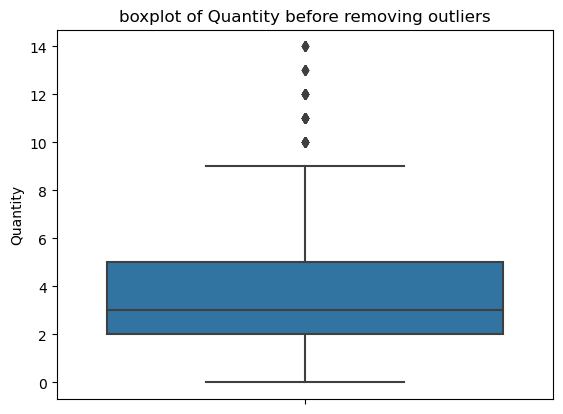

In [21]:
sns.boxplot(y=df['Quantity'])
plt.title('boxplot of Quantity before removing outliers')
plt.show()

In [22]:
df['Quantity'] =df['Quantity'].apply(lambda x:8 if x > 8 else x)
df['Quantity']=df['Quantity'].apply(lambda x:1 if x < 1 else x)

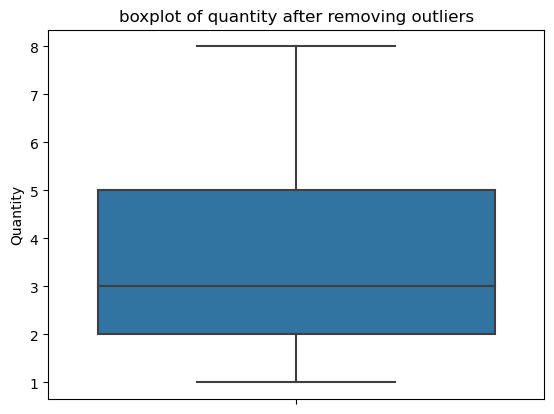

In [23]:
sns.boxplot(y=df['Quantity'])
plt.title('boxplot of quantity after removing outliers')
plt.show()

2. * Sales:We have more outliers in sales ,lets try z_score methodology to remove outliers *
* NOTE: we dont remove all outliers because it leads to data underfittng ,try to remove very few outliers 

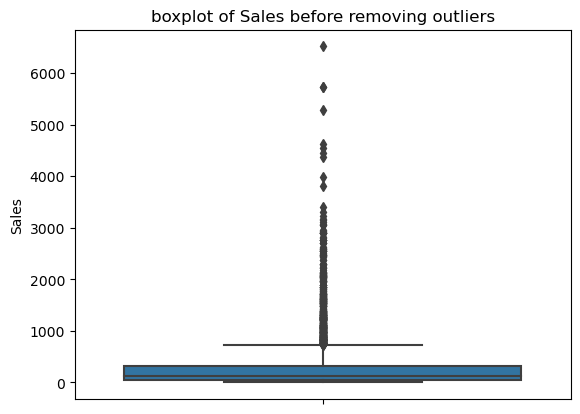

In [24]:
sns.boxplot(y=df['Sales'])
plt.title('boxplot of Sales before removing outliers')
plt.show()

In [25]:
#Sales-Z-score

In [26]:

# Calculate Z-scores for the 'Sales' column in your DataFrame
z_scores = np.abs(stats.zscore(df['Sales']))

# Set a Z-score threshold for identifying outliers
z_score_threshold = 2

# Find the indices of the outliers
outlier_indices = np.where(z_scores > z_score_threshold)

# Get the values of the outliers from the 'Sales' column
outliers = df['Sales'].iloc[outlier_indices]

In [27]:
df.drop(df.index[outlier_indices[0]], inplace=True)

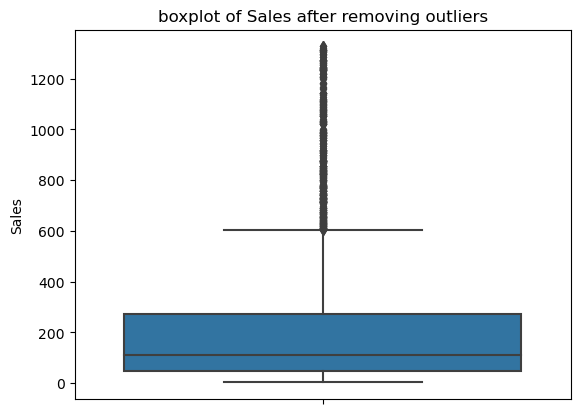

In [28]:
# Here we are removing the Zero Sales Customers and plotting the boxplot after removing few outliers
df = df[df['Sales'] != 0]
sns.boxplot(y=df['Sales'])
plt.title('boxplot of Sales after removing outliers')
plt.show()

3. *Cost:it can be implimented using interquantile range*

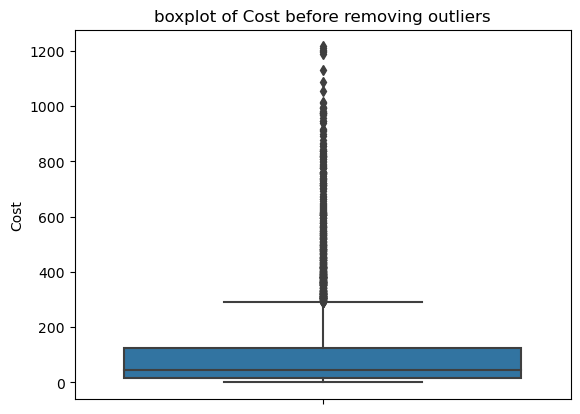

In [29]:
sns.boxplot(y=df['Cost'])
plt.title('boxplot of Cost before removing outliers')
plt.show()

In [30]:
# Removing sample which are having cost as zero

df=df[df['Cost'] !=0 ]
# lets know the stats of  column
df['Cost'].describe()

count    3863.000000
mean      112.576495
std       167.375530
min         1.000000
25%        18.000000
50%        47.000000
75%       128.000000
max      1216.000000
Name: Cost, dtype: float64

In [31]:
# check the quantile distribution and fix the quantile-1 and quantile-3
print("80%:",df['Cost'].quantile(0.80),"\n"
      "85%:",df['Cost'].quantile(0.85),"\n"
      "90%:",df['Cost'].quantile(0.90),"\n"
      "95%:",df['Cost'].quantile(0.95))

80%: 164.0 
85%: 221.69999999999982 
90%: 306.8000000000002 
95%: 452.7999999999993


In [32]:
df[df['Cost']>df['Cost'].quantile(0.95)]['Order ID'].count()

194

In [33]:
df[df['Cost']<df['Cost'].quantile(0.05)]['Order ID'].count()

179

In [34]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Cost'].quantile(0.05)
Q3 = df['Sales'].quantile(0.90)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

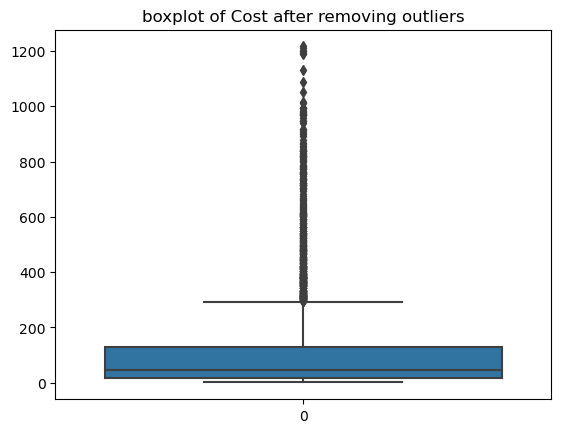

In [35]:
sns.boxplot(df['Cost'])
plt.title('boxplot of Cost after removing outliers')
plt.show()

**NOTE: These are some extra work we can even remove outliers based on analyzing bivariate but it leads to more removal of samples for now we can avoid it but when we have large sacle of dataset (above 20k) we can don that.**

<Axes: xlabel='Category', ylabel='Cost'>

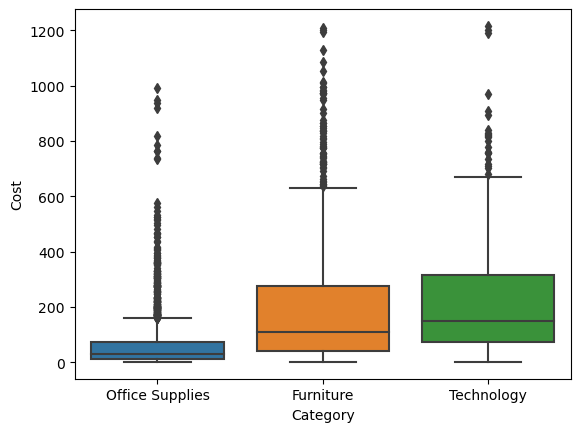

In [36]:
sns.boxplot(x='Category', y='Cost', data=df)

* Category: ___Max-cost___  --   df.groupby('Category')['Cost'].max()
1. Furniture      -    1210.0
2. Office Supplies -    993.0
3. Technology    -     1216.0

* Category: ___Avg-cost___ --     df.groupby('Category')['Cost'].mean()
1. Furniture      -    198.284842
2. Office Supplies-    61.269586
3. Technology   -      223.705882

---

### 6.ANALYSIS - (UNI,BI,MULTI)

In [37]:
#uni-variet Analysis

df.dtypes

Order ID                float64
Order Date       datetime64[ns]
Customer Name            object
City                     object
Country                  object
State                    object
Region                   object
Region.1                 object
Segment                  object
Ship Mode                object
Category                 object
Sub-Category             object
Product Name             object
Cost                    float64
Sales                   float64
Profit                  float64
Quantity                float64
dtype: object

In [38]:
#1.Categorical columns

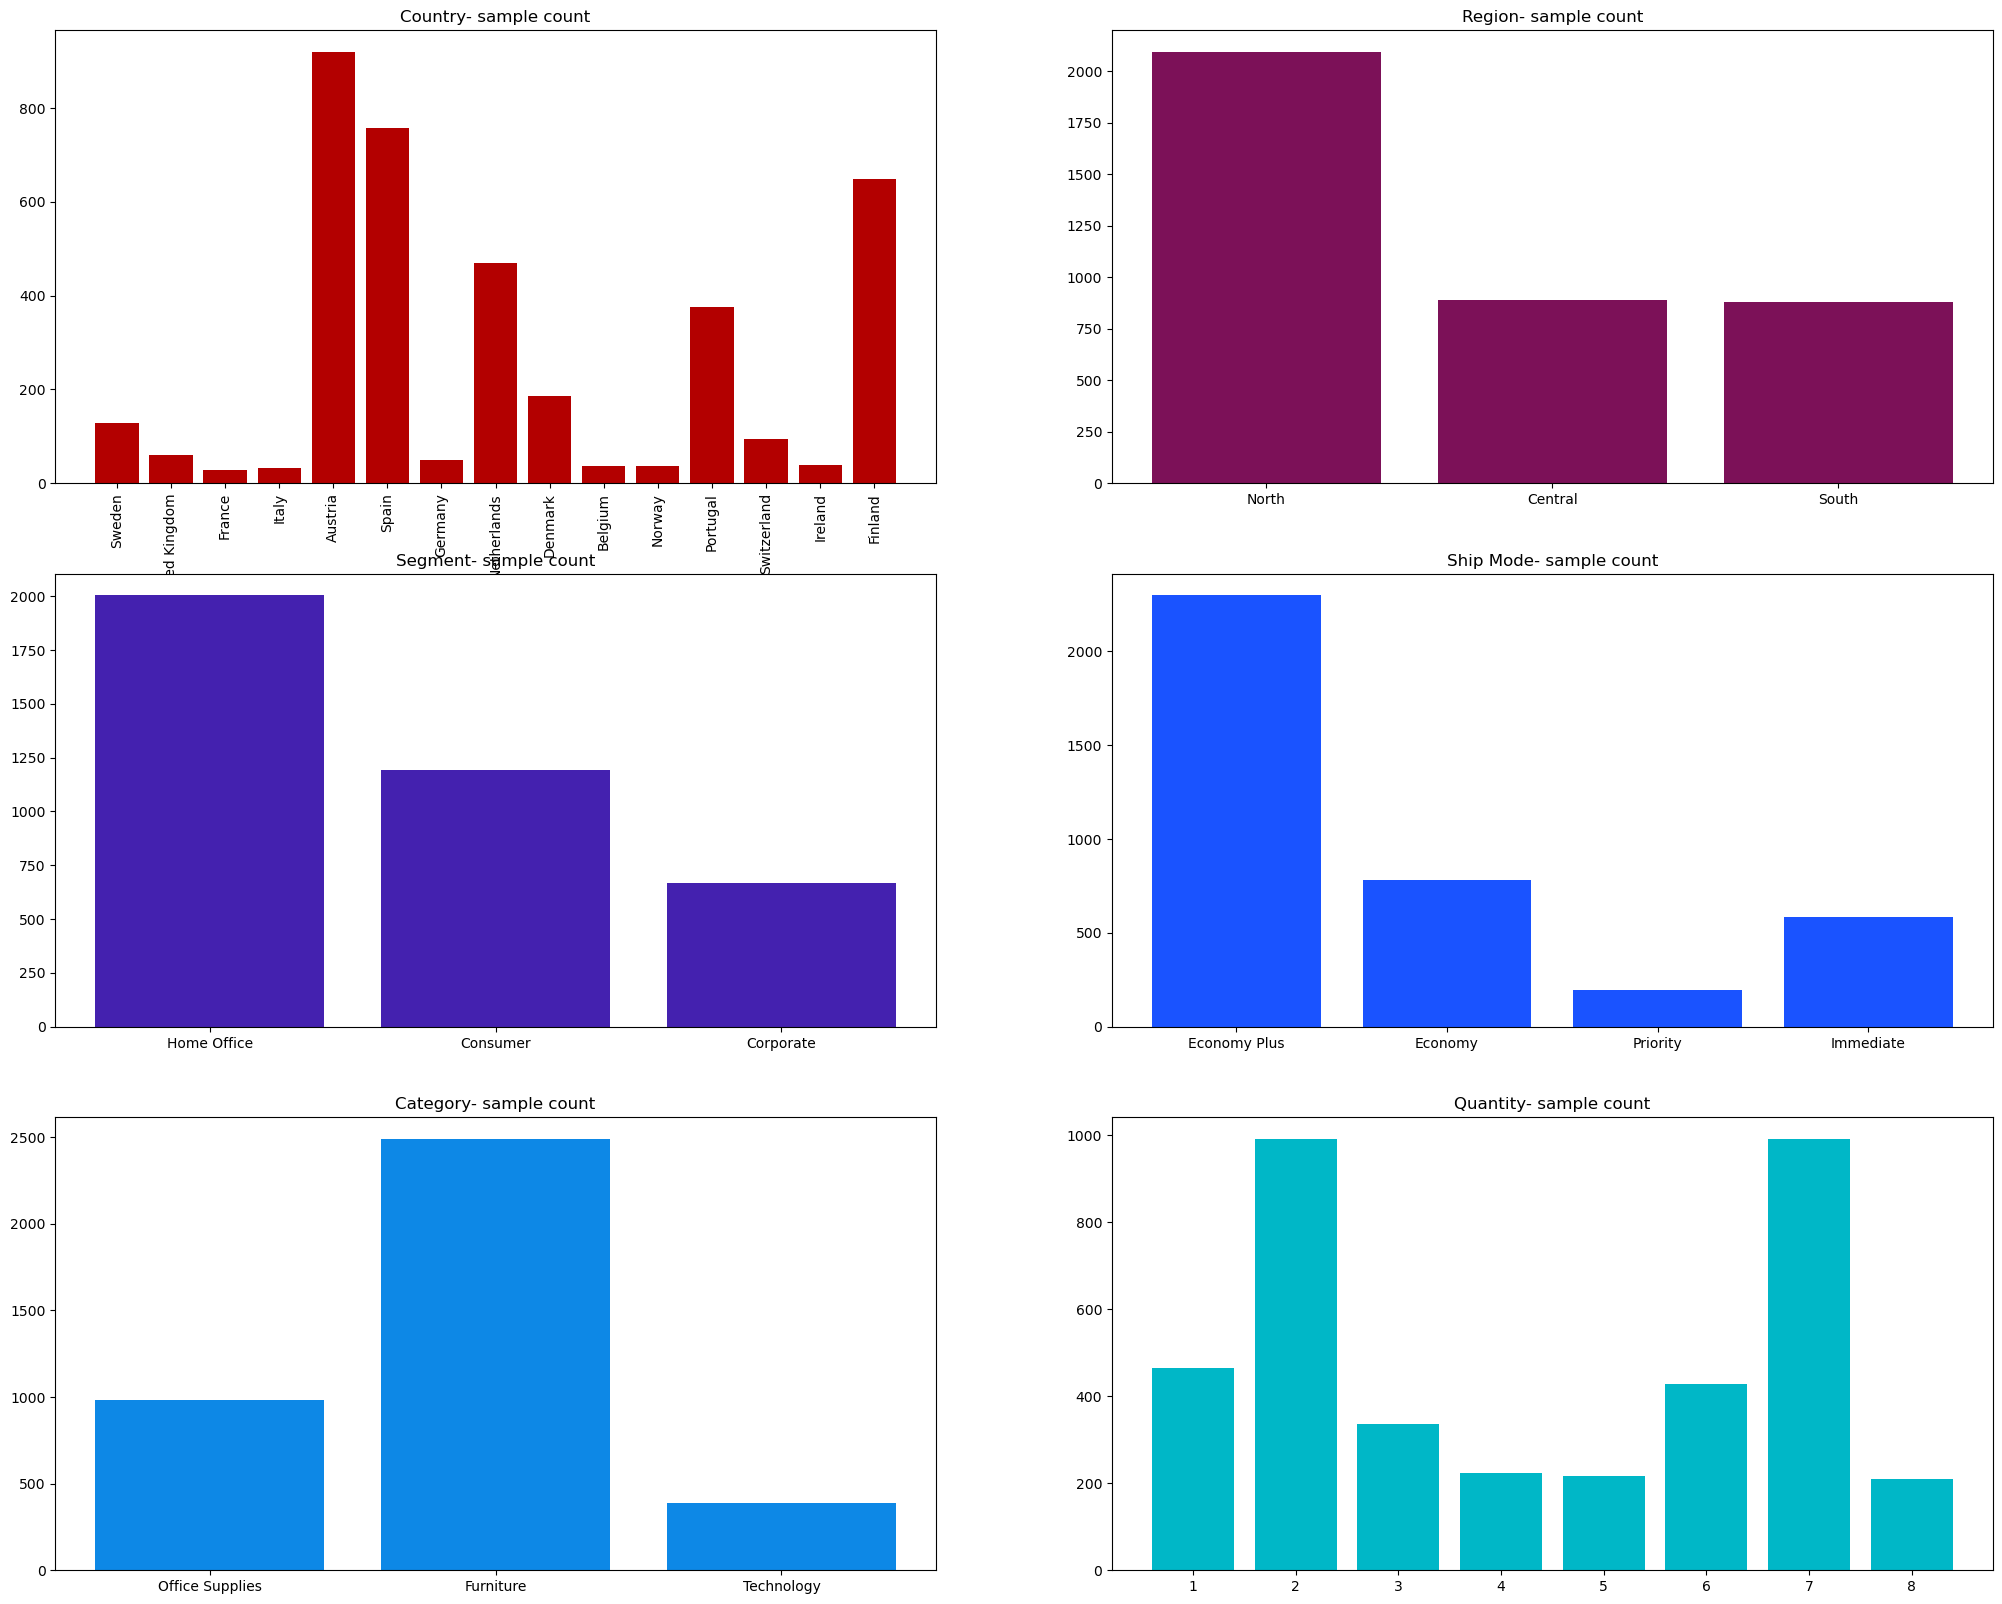

In [39]:
# Subplots
plt.figure(figsize=(25, 20))

Country_values=df.groupby('Country')['Order ID'].count()
plt.subplot(3, 2, 1)
plt.bar(df['Country'].unique(), Country_values, color="#b30000")
plt.xticks(rotation=90)
plt.title('Country- sample count')

region_values=df.groupby('Region')['Order ID'].count()
plt.subplot(3, 2, 2)
plt.bar(df['Region'].unique(), region_values, color= "#7c1158")
plt.title('Region- sample count')

Segment_values=df.groupby('Segment')['Order ID'].count()
plt.subplot(3, 2, 3)
plt.bar(df['Segment'].unique(), Segment_values, color="#4421af")
plt.title('Segment- sample count')

ShipMode_values=df.groupby('Ship Mode')['Order ID'].count()
plt.subplot(3, 2, 4)
plt.bar(df['Ship Mode'].unique(), ShipMode_values, color="#1a53ff")
plt.title('Ship Mode- sample count')

Category_values=df.groupby('Category')['Order ID'].count()
plt.subplot(3, 2, 5)
plt.bar(df['Category'].unique(), Category_values, color="#0d88e6")
plt.title('Category- sample count')

Quantity_values=df.groupby('Quantity')['Order ID'].count()
plt.subplot(3, 2, 6)
plt.bar(df['Quantity'].unique(), Quantity_values, color="#00b7c7")
plt.title('Quantity- sample count')

plt.savefig('Category.png')
plt.show()

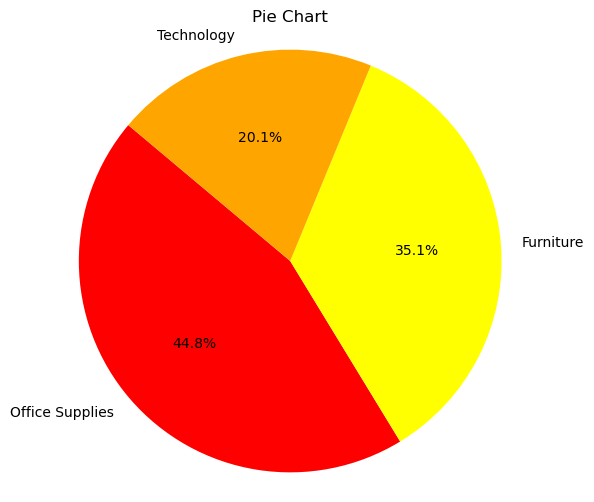

In [40]:
colors = ['red', 'yellow', 'orange']
values=df.groupby('Category')['Cost'].sum()
plt.figure(figsize=(6, 6))
plt.pie(values, colors=colors,labels=df['Category'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [41]:
#numeric
num_list=['Cost','Profit','Sales']
for col in num_list:
    print("______",col,"_____")
    print(df[col].describe())
    print('\n')

______ Cost _____
count    3863.000000
mean      112.576495
std       167.375530
min         1.000000
25%        18.000000
50%        47.000000
75%       128.000000
max      1216.000000
Name: Cost, dtype: float64


______ Profit _____
count    3863.000000
mean      111.556562
std       168.452935
min         1.000000
25%        18.000000
50%        47.000000
75%       128.000000
max      1269.000000
Name: Profit, dtype: float64


______ Sales _____
count    3863.000000
mean      224.086461
std       269.323401
min         3.000000
25%        50.000000
50%       114.000000
75%       278.000000
max      1327.000000
Name: Sales, dtype: float64




Text(0.5, 1.0, 'Quantity violin plot')

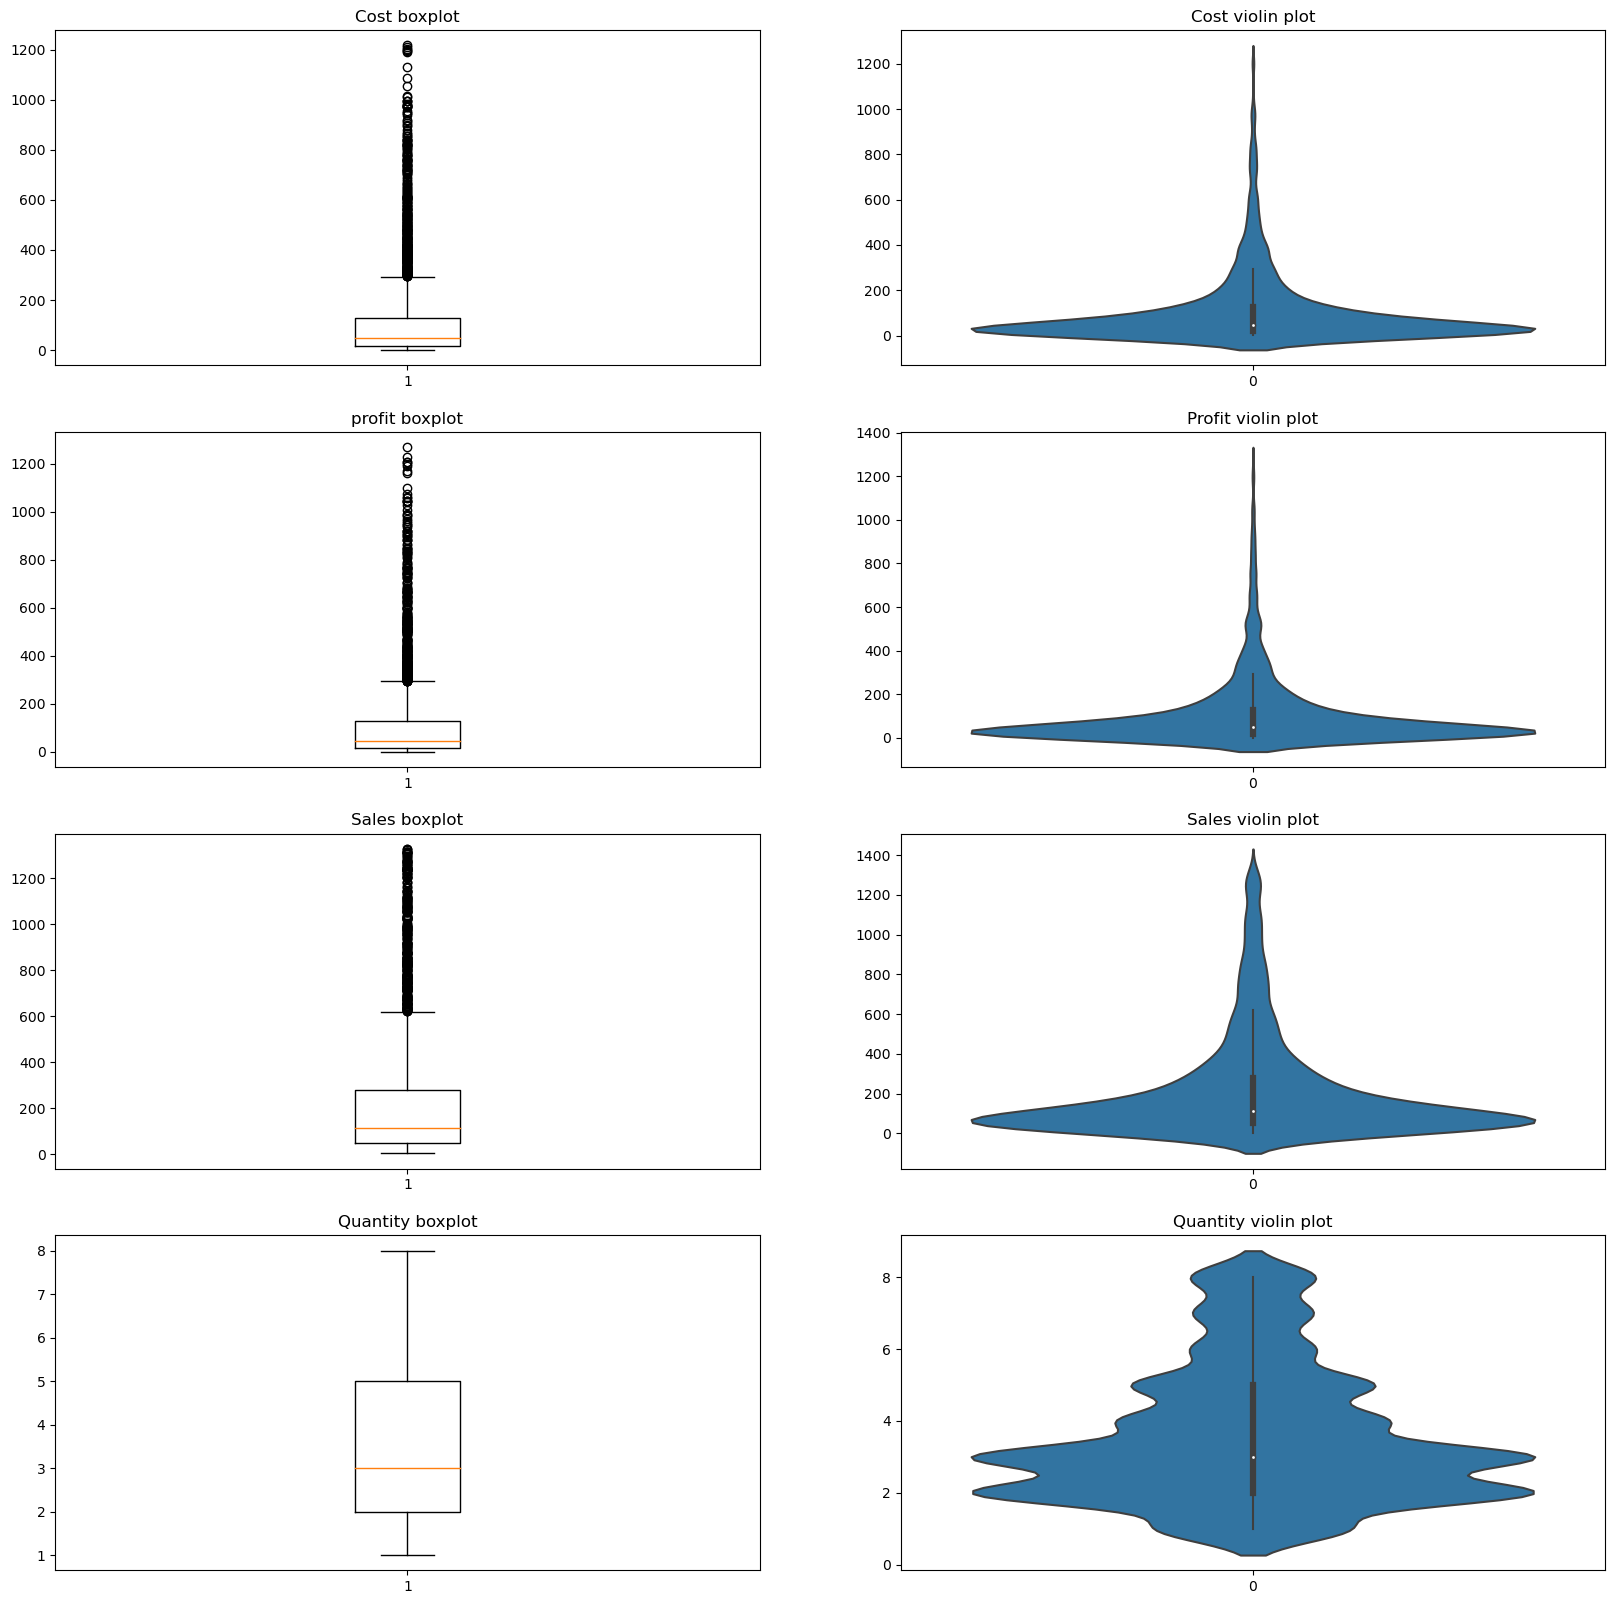

In [42]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
plt.boxplot(df['Cost'])
plt.title('Cost boxplot')

plt.subplot(4,2,2)
sns.violinplot(df['Cost'])
plt.title('Cost violin plot')

plt.subplot(4,2,3)
plt.boxplot(df['Profit'])
plt.title('profit boxplot')

plt.subplot(4,2,4)
sns.violinplot(df['Profit'])
plt.title('Profit violin plot')

plt.subplot(4,2,5)
plt.boxplot(df['Sales'])
plt.title('Sales boxplot')

plt.subplot(4,2,6)
sns.violinplot(df['Sales'])
plt.title('Sales violin plot')

plt.subplot(4,2,7)
plt.boxplot(df['Quantity'])
plt.title('Quantity boxplot')

plt.subplot(4,2,8)
sns.violinplot(df['Quantity'])
plt.title('Quantity violin plot')

In [46]:
#Bivariate Analysis:

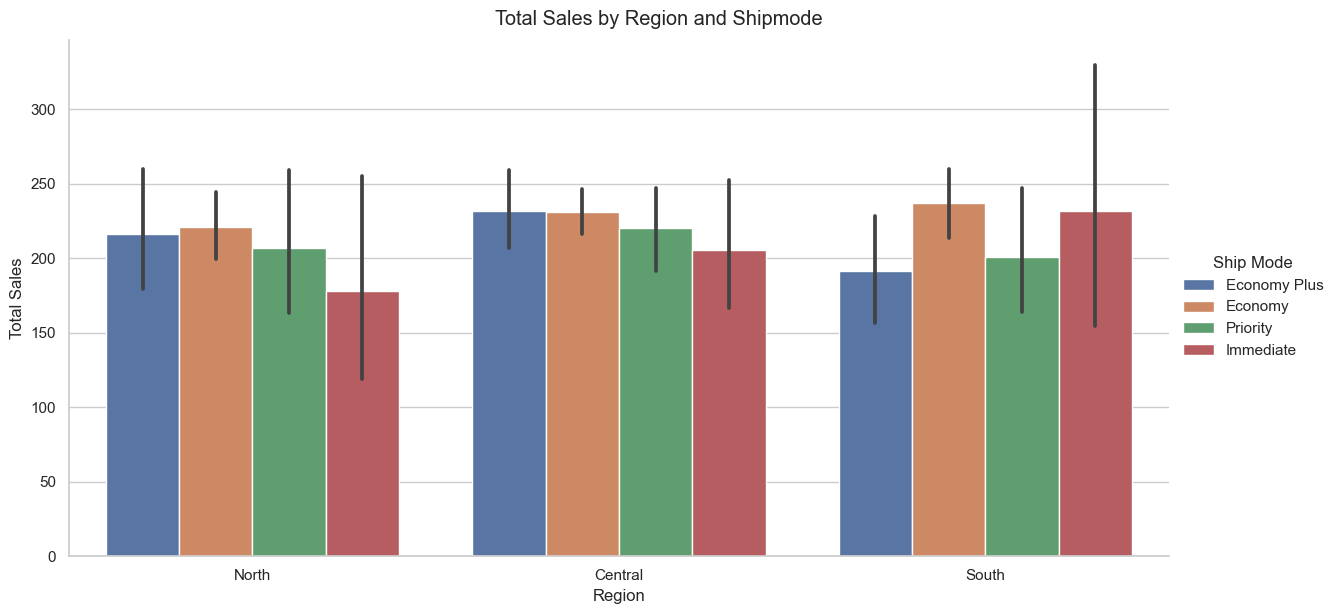

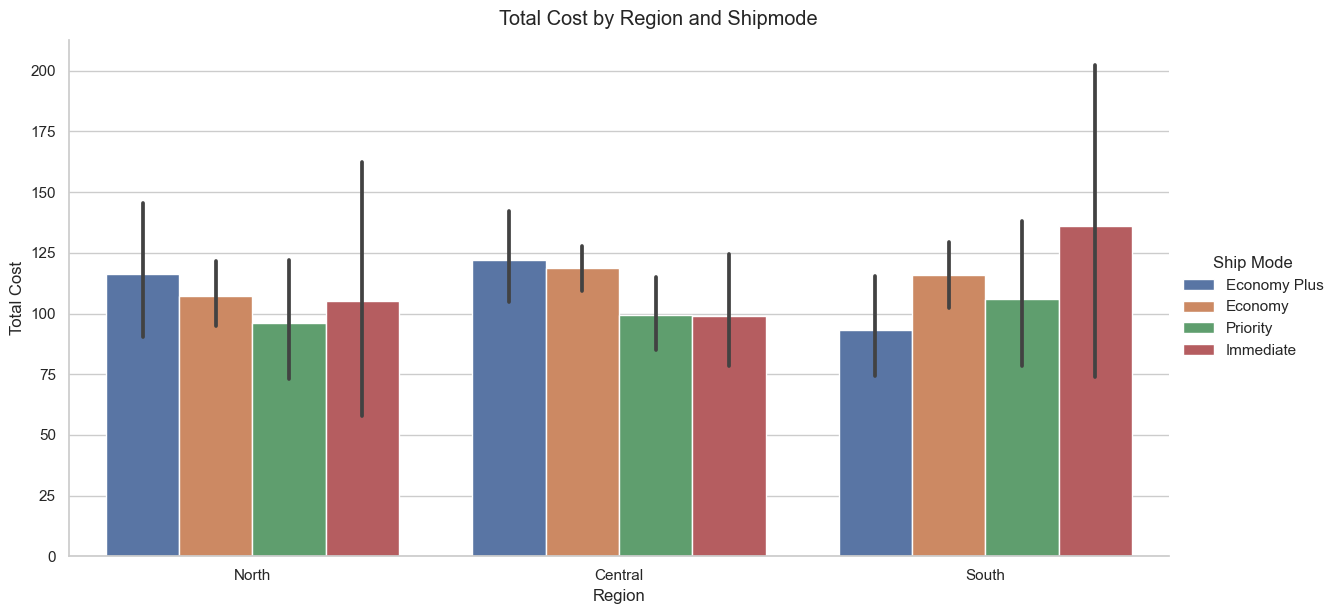

In [55]:

sns.set(style="whitegrid")

# Create a facet grid for side-by-side bar charts
g = sns.catplot(data=df, x='Region', y='Sales', hue='Ship Mode', kind='bar', height=6, aspect=2)
g.set_axis_labels('Region', 'Total Sales')
g._legend.set_title('Ship Mode')
g.fig.suptitle('Total Sales by Region and Shipmode', y=1.02)

# Create another facet grid for 'Total Cost'
g = sns.catplot(data=df, x='Region', y='Cost', hue='Ship Mode', kind='bar', height=6, aspect=2)
g.set_axis_labels('Region', 'Total Cost')
g._legend.set_title('Ship Mode')
g.fig.suptitle('Total Cost by Region and Shipmode', y=1.02)

plt.show()

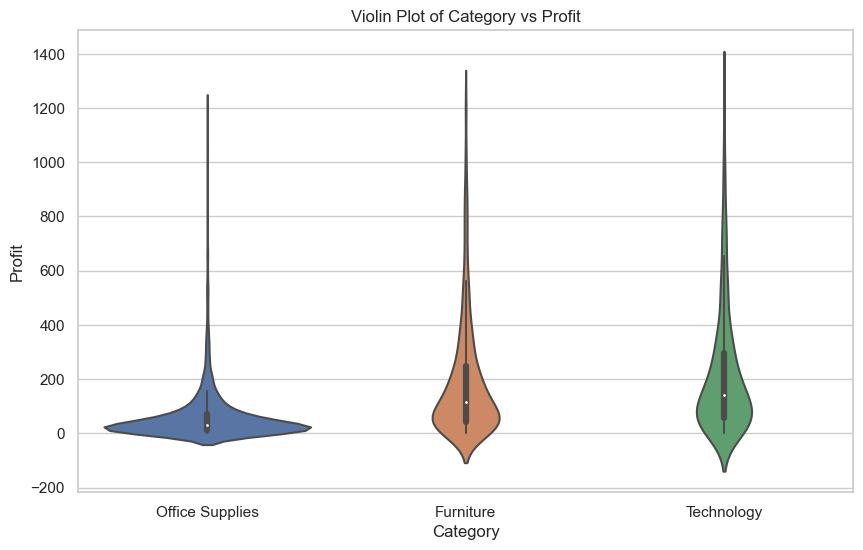

In [58]:
# Violin Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(x="Category", y="Profit", data=df)
plt.title("Violin Plot of Category vs Profit")
plt.show()

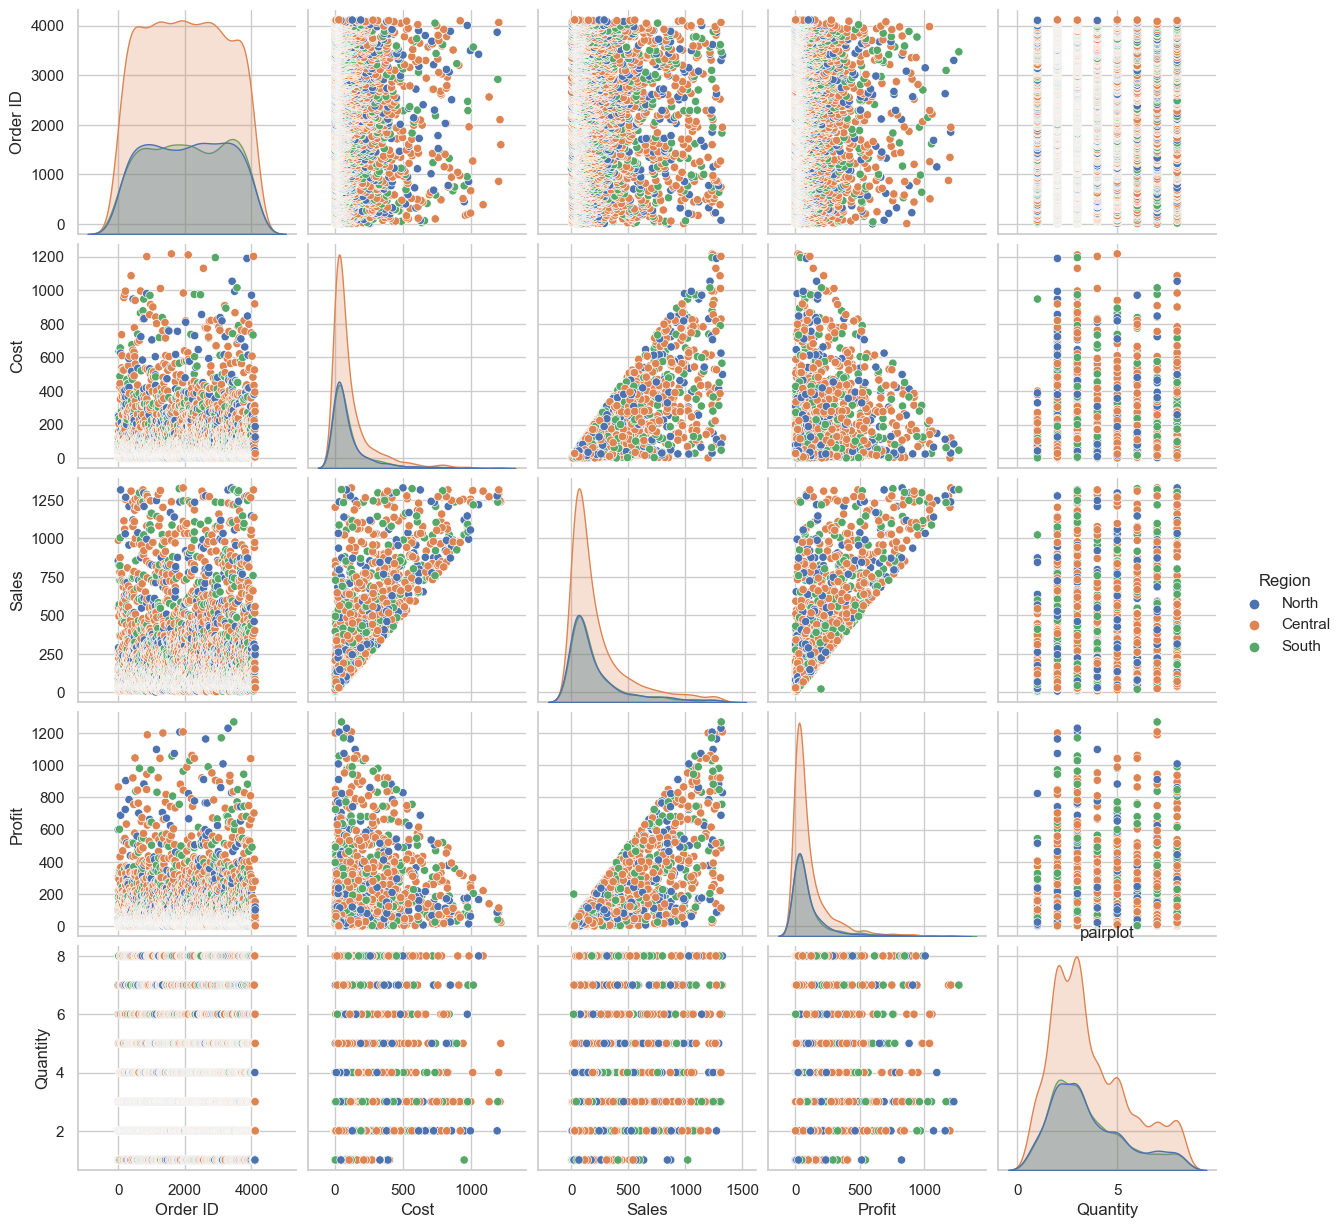

In [57]:
#MULTI-VARIATE ANALYSIS

sns.pairplot(df,hue='Region')
plt.title("pairplot")
plt.savefig('pairplot.png')
plt.show()

---

### 7.DISTRIBUTION

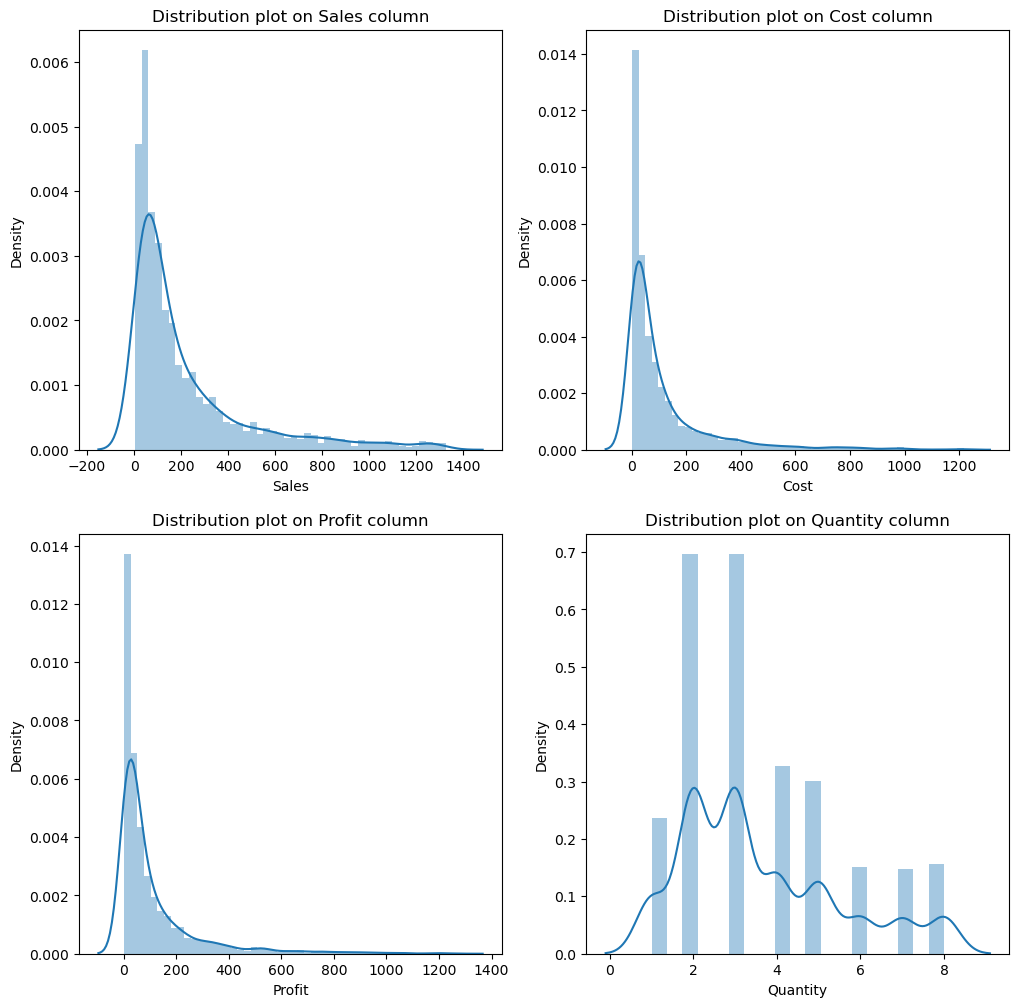

In [48]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.distplot(df['Sales'])
plt.title('Distribution plot on Sales column')

plt.subplot(2,2,2)
sns.distplot(df['Cost'])
plt.title('Distribution plot on Cost column')

plt.subplot(2,2,3)
sns.distplot(df['Profit'])
plt.title('Distribution plot on Profit column')

plt.subplot(2,2,4)
sns.distplot(df['Quantity'])
plt.title('Distribution plot on Quantity column')

plt.savefig('distribution.png')
plt.show()

<Axes: ylabel='Density'>

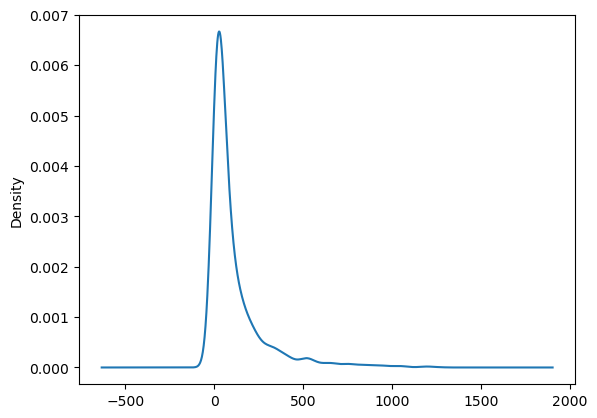

In [45]:
df.Profit.plot(kind='density')
plt.title('density plot on profit column')
plt.show()

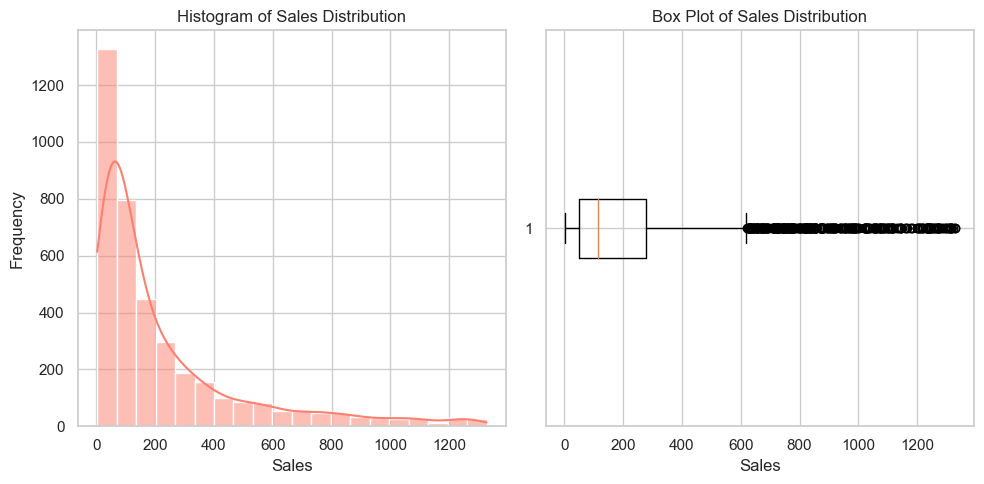

In [69]:
sales_data = df['Sales']

# Create a histogram to visualize the distribution of sales
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(sales_data, bins=20, color="#fd7f6f",kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Distribution')

# Create a box plot to visualize the distribution of sales
plt.subplot(1, 2, 2)
plt.boxplot(sales_data, vert=False)
plt.xlabel('Sales')
plt.title('Box Plot of Sales Distribution')

plt.tight_layout()
plt.show()

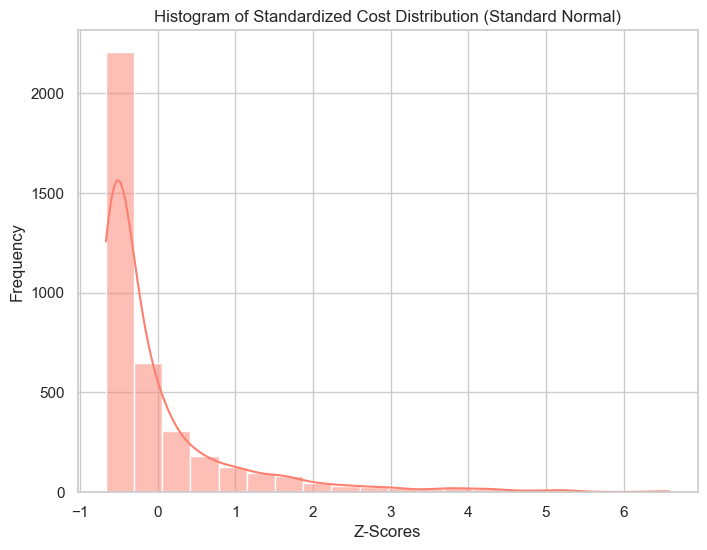

In [71]:
sales = df['Cost']
z_scores = stats.zscore(sales)
# Create a histogram to visualize the standardized 'Sales' distribution
plt.figure(figsize=(8, 6))
sns.histplot(z_scores, bins=20, color="#fd7f6f", kde=True)
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Cost Distribution (Standard Normal)')

plt.show()

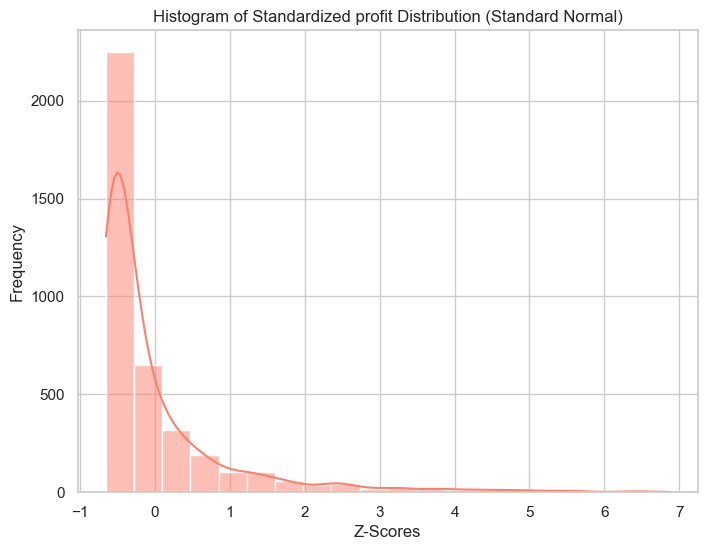

In [72]:
sales = df['Profit']
z_scores = stats.zscore(sales)
# Create a histogram to visualize the standardized 'Sales' distribution
plt.figure(figsize=(8, 6))
sns.histplot(z_scores, bins=20, color="#fd7f6f",kde=True)
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized profit Distribution (Standard Normal)')

plt.show()

---

### 8.HYPOTHESIS TESTING

In [66]:
# Define your null and alternative hypotheses
# For example, to test if there's a significant difference between 'Sales' and 'Cost':
# H0: There is no significant difference between 'Sales' and 'Cost'
# H1: There is a significant difference between 'Sales' and 'Cost'

# Set the significance level (alpha)
alpha = 0.05

# Perform a two-sample t-test to compare 'Sales' and 'Cost'
t_stat, p_value = stats.ttest_ind(df['Sales'], df['Cost'])

# Compare the p-value to alpha to determine statistical significance
if p_value < alpha:
    print(f'Reject the null hypothesis. There is a significant difference between Sales and Cost (p-value = {p_value})')
else:
    print(f'Fail to reject the null hypothesis. There is no significant difference between Sales and Cost (p-value = {p_value})')

Reject the null hypothesis. There is a significant difference between Sales and Cost (p-value = 8.334188769047838e-103)


---

### *QUESTIONS AND THEIR INSIGHTS*

1. Give me the five numbered summary?

In [10]:
df.describe()

,Order ID,Cost,Sales,Profit,Quantity
count,4115.000000,4115.000000,4115.000000,4115.000000,4115.000000
mean,2058.000000,155.673633,308.034994,152.361361,3.747266
std,1188.042508,319.455633,511.485538,295.423113,2.174294
min,1.000000,0.000000,3.000000,1.000000,1.000000
25%,1029.500000,18.000000,50.000000,19.000000,2.000000
50%,2058.000000,50.000000,120.000000,50.000000,3.000000
75%,3086.500000,144.000000,322.000000,146.000000,5.000000
max,4115.000000,4476.000000,6517.000000,3460.000000,14.000000


2. Are there any factors that affecting the sales ?

* Yes there is a factor which effecting the sales,When you check below graph you can observe that there is three bar plots in each year which represent satrt,mid and end of the year sales 
* In each and every satrt of the year there is a decrese in the no.of sales.

In [11]:
df['year']=pd.DatetimeIndex(df['Order Date']).year
df['month']=pd.DatetimeIndex(df['Order Date']).month

def convert_month_to_quarter(month):
    if 1<= month <=4:
        return 'S'
    elif 5<= month <=8:
        return 'M'
    else:
        return 'E'
df['Quarter'] = df['month'].apply(convert_month_to_quarter)

df.drop('month',axis=1,inplace=True)

year=[]
sales_S=[]
sales_M=[]
sales_E=[]
for i in df['year'].unique():
    for j in df['Quarter'].unique():
       
        if j == 'S':
            sales_S.append(df[(df['year']==i) & (df['Quarter']==j)]['Sales'].sum())
        elif j == 'M':
            sales_M.append(df[(df['year']==i) & (df['Quarter']==j)]['Sales'].sum())
        elif j == 'E':
            sales_E.append(df[(df['year']==i) & (df['Quarter']==j)]['Sales'].sum())
        
#plt.hist([sales_S,sales_M,sales_E],bins=[2017,2018,2019,2020],histtype="bar")
        

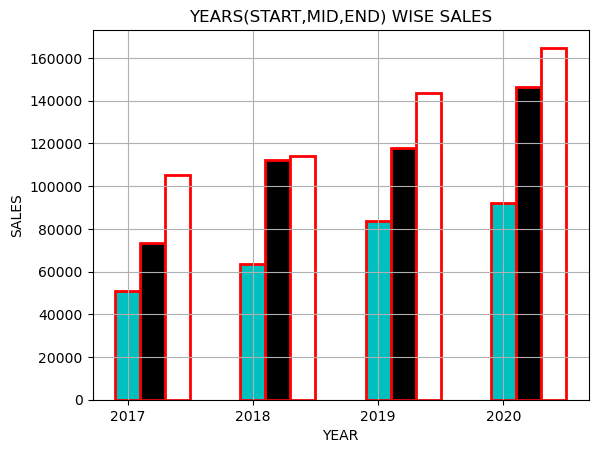

In [12]:
y=['2017','2018','2019','2020']
index=np.arange(len(y))
# plt.bar(index,div_a)

plt.bar(index,sales_S, width =0.2, color = 'c', edgecolor = 'r',linewidth =2)

plt.bar(index + 0.2,sales_M, width =0.2, color = 'k', edgecolor = 'r',linewidth =2)

plt.bar(index+0.4,sales_E, width =0.2, color = 'w', edgecolor = 'r',linewidth =2)

plt.xticks(index,y)

plt.title("YEARS(START,MID,END) WISE SALES")

plt.xlabel('YEAR')
plt.ylabel('SALES')
plt.grid(True) # displays grid
plt.show()

3. What is the sum of the sales in each country?

In [13]:
Countries=df['Country'].unique()
Sales=[]
for i in Countries:
    Sales.append(df[df['Country']==i]['Sales'].sum())
df2=pd.DataFrame(Sales,index=Countries,columns=['Sales'])
df2

,Sales
Sweden,17962
United Kingdom,236839
France,348322
Italy,130571
Austria,41276
Spain,140397
Germany,236399
Netherlands,36296
Denmark,4083
Belgium,24509


4. Give me the sum of the quantity of orders in each region?


In [14]:
quantity=[]
for i in df['Region'].unique():
        quantity.append(df[df['Region']==i]['Quantity'].sum())
df3=pd.DataFrame(quantity,index=df['Region'].unique(),columns=['Sum of quantity'])
df3

,Sum of quantity
North,3503
Central,8498
South,3419


5. In which region does sales are high? 

In [15]:
Sales=[]
for i in df['Region'].unique():
        Sales.append(df[df['Region']==i]['Sales'].sum())
df4=pd.DataFrame(Sales,index=df['Region'].unique(),columns=['Sum of Sales'])
df4

,Sum of Sales
North,289019
Central,698245
South,280300


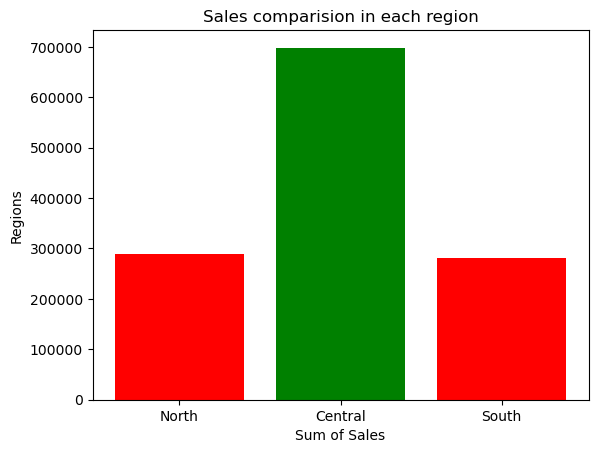

In [16]:
Regions=df['Region'].unique
plt.bar(['North','Central','South'],Sales,color=['r','g','r'])
plt.xlabel('Sum of Sales')
plt.ylabel("Regions")
plt.title("Sales comparision in each region")
plt.show()

6. Give me the top list of company customers by sales. 

In [17]:
df.sort_values('Sales',ascending=0).head()

,Order ID,Order Date,Customer Name,City,Country,State,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity,year,Quarter
452,453,2017-09-08,Alexander Bond,Lugo,Spain,Galicia,South,Corporate,Economy Plus,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",3328,6517,3189,12,2017,E
3903,3904,2020-11-19,Bettie Lang,Lille,France,Nord-Pas-de-Calais-Picardie,Central,Consumer,Economy,Furniture,Chairs,"Hon Executive Leather Armchair, Adjustable",3380,5729,2349,14,2020,E
1020,1021,2018-05-29,Harrison Cooke,Luton,United Kingdom,England,North,Consumer,Immediate,Technology,Phones,"Nokia Smart Phone, Full Size",4039,5725,1686,9,2018,M
1837,1838,2019-02-27,George Dawson,Edinburgh,United Kingdom,Scotland,North,Home Office,Economy Plus,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",2178,5274,3096,10,2019,S
2634,2635,2019-11-22,Rebecca Heysen,Marseille,France,Provence-Alpes-Côte d'Azur,Central,Corporate,Economy,Office Supplies,Appliances,"KitchenAid Stove, Red",3659,4618,959,9,2019,E


7. What is the total sales of the company.

In [18]:
print("Total Sum.of Sales :",df['Sales'].sum())

Total Sum.of Sales : 1267564


8. Which item has the heighest price.

In [19]:
for i in df['Category'].unique():
    print("Maximum cost of item (",i,"):",df[df['Category']==i]['Cost'].max())
print()
print("Office supplie item  has the maximum cost")    

Maximum cost of item ( Office Supplies ): 3659
Maximum cost of item ( Furniture ): 4476
Maximum cost of item ( Technology ): 4039

Office supplie item  has the maximum cost


9. Divide the sales based on the shipping mode.

In [20]:
for i in df['Ship Mode'].unique():
    print("Ship Mode (",i,") :",df[df['Ship Mode']==i]['Sales'].sum())

Ship Mode ( Economy Plus ) : 274189
Ship Mode ( Economy ) : 749373
Ship Mode ( Priority ) : 174094
Ship Mode ( Immediate ) : 69908


10. Which features pairs are more correlated?

* Based on below correltion table (Sales,Cost) are more correlated (84%)

In [21]:
df.corr()

,Order ID,Cost,Sales,Profit,Quantity,year
Order ID,1.000000,0.011280,-0.000187,-0.012522,-0.001767,0.961277
Cost,0.011280,1.000000,0.845776,0.382999,0.285493,0.012342
Sales,-0.000187,0.845776,1.000000,0.816786,0.338450,0.000823
Profit,-0.012522,0.382999,0.816786,1.000000,0.277264,-0.011922
Quantity,-0.001767,0.285493,0.338450,0.277264,1.000000,0.001289
year,0.961277,0.012342,0.000823,-0.011922,0.001289,1.000000


11. In which year the sales were at highest?
* Ans: year 2020 hasthe heighest no.of Sales

In [22]:
for i in df['year'].unique():
    print("Year (",i,") :",df[df['year']==i]['Sales'].sum())

Year ( 2017 ) : 229391
Year ( 2018 ) : 289555
Year ( 2019 ) : 344917
Year ( 2020 ) : 403701


12. Who are the customers that orders less?

In [23]:
df[df['Quantity'] == 1].sort_values("Cost",ascending=1).head()

,Order ID,Order Date,Customer Name,City,Country,State,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Cost,Sales,Profit,Quantity,year,Quarter
2835,2836,2020-01-18,Anthony Lawrence,Chaumont,France,Alsace-Champagne-Ardenne-Lorraine,Central,Consumer,Economy,Office Supplies,Envelopes,"Jiffy Manila Envelope, with clear poly window",0,30,30,1,2020,S
2491,2492,2019-10-05,Jacob Roemer,Dresden,Germany,Saxony,Central,Corporate,Economy,Office Supplies,Paper,"Enermax Cards & Envelopes, Premium",0,24,24,1,2019,E
4001,4002,2020-12-10,Madison Rowley,Stockholm,Sweden,Stockholm,North,Consumer,Economy,Office Supplies,Art,"Binney & Smith Pens, Water Color",0,8,8,1,2020,E
1068,1069,2018-06-15,Viola Watson,Birmingham,United Kingdom,England,North,Consumer,Economy,Furniture,Chairs,"Office Star Bag Chairs, Black",0,27,27,1,2018,M
3800,3801,2020-10-28,Rebecca Cook,Arezzo,Italy,Tuscany,South,Corporate,Economy,Office Supplies,Binders,"Cardinal Index Tab, Durable",0,8,8,1,2020,E


13. Which country has least sales ?

In [24]:
country_sales=df.groupby('Country')['Sales'].agg('sum')
country_sales.reset_index().sort_values('Sales',ascending=1)

,Country,Sales
2,Denmark,4083
6,Ireland,8756
9,Norway,8854
10,Portugal,9332
13,Switzerland,11443
3,Finland,12525
12,Sweden,17962
1,Belgium,24509
8,Netherlands,36296
0,Austria,41276


14. What is the net profit made by the company ?

In [25]:
print("Net profit made by the compnay is :",df['Profit'].sum())

Net profit made by the compnay is : 626967


15. Give me the count of orders in each orers.

In [26]:
df.groupby('Region')['Order ID'].agg("count").reset_index()

,Region,Order ID
0,Central,2233
1,North,949
2,South,933


16. which item has sold more in the year 2020.
* Ans: based on below table in year 2020 the Office Supplies are sold out more

In [27]:
df.groupby(['year','Category'])['Quantity'].sum().reset_index()

,year,Category,Quantity
0,2017,Furniture,741
1,2017,Office Supplies,1782
2,2017,Technology,279
3,2018,Furniture,944
4,2018,Office Supplies,2251
5,2018,Technology,363
6,2019,Furniture,1060
7,2019,Office Supplies,2563
8,2019,Technology,478
9,2020,Furniture,1272


17. In which country the sles of items are more

*  France has the more no.of sales

In [28]:
df.groupby('Country')['Sales'].agg("sum").reset_index().sort_values('Sales',ascending=0)

,Country,Sales
4,France,348322
14,United Kingdom,236839
5,Germany,236399
11,Spain,140397
7,Italy,130571
0,Austria,41276
8,Netherlands,36296
1,Belgium,24509
12,Sweden,17962
3,Finland,12525


18. What are the segments in dataset how do they work?
* Segment says that the kind of the customer whether he is a consumer or corporate person or a home office

In [29]:
df.groupby('Segment')['Sales'].agg('sum')

Segment
Consumer       680538
Corporate      378578
Home Office    208448
Name: Sales, dtype: int64

19. What is total count of items that was ordered by the customers ?

In [30]:
df['Quantity'].sum()

15420

20. Apply the statistics on sub-categories  in the dataset?